<h1 style="color: #9B243A;">Natural Language Processing Challenge</h1>

<h3 style="color: #b35a;">-- Importing important libraries --</h3>

In [1]:
# 📚 Basic Libraries
import pandas as pd
import matplotlib.pyplot as plt
import warnings


# 📝 Text Processing
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

# Machine Learning
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [2]:
# ⚙️ Settings
pd.set_option('display.max_columns', None) # display all columns
warnings.filterwarnings('ignore') # ignore warnings

<h1 style="color: #e8891d;">Data Extraction</h1>

In [3]:
data = pd.read_csv('training_data.csv', sep="\t", header=None)
df = data.copy()

In [4]:
df.columns = ['tag', 'headline']

In [5]:
df.sample(10)

,tag,headline
30346,1,vatican should bring money-laundering cases to...
14810,0,great news! house gop moderates threaten ‚you ...
7925,0,what beyonc√©¬†just announced she is doing for...
27157,1,u.s. republicans want to slash obama's securit...
26035,1,factbox: u.s. republican lawmakers who say the...
22466,1,leading republicans\tdemocrats reject trump's ...
31117,1,three dead bodies pulled from sea near spain a...
29688,1,argentina fires head of navy over submarine tr...
15728,0,public housing residents getting free cars in ...
15866,0,wow! tucker carlson takes on obamacare archite...


<h3 style="color: #b35a;">-- Exploring the data (Overview) --</h3>

The dataset contains news headlines from Reddit's world news channel, along with their tags: 0, if the headline is fake news, and, 1, if the headline is real news..

<h3 style="color: #b35a;">-- Features --</h3>

- **`headline`**: News headline.
- **`tag`**: 0, if the headline is fake news, and, 1, if the headline is real news.

In [6]:
df.tag.value_counts()

tag
0    17572
1    16580
Name: count, dtype: int64

In [7]:
df.shape

(34152, 2)

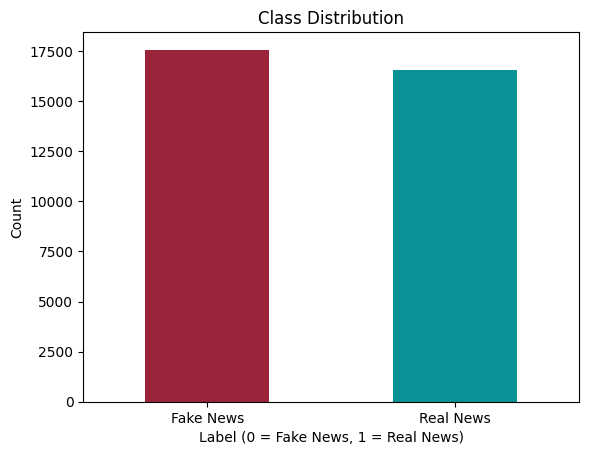

In [8]:
df['tag'].value_counts().plot(kind='bar', color=['#9B243A', '#0A9396'])
plt.title("Class Distribution")
plt.xlabel("Label (0 = Fake News, 1 = Real News)")
plt.ylabel("Count")
plt.xticks([0, 1], ['Fake News', 'Real News'], rotation=0)
plt.show()

<h3 style="color: #b35a;">-- Word Clouds --</h3>

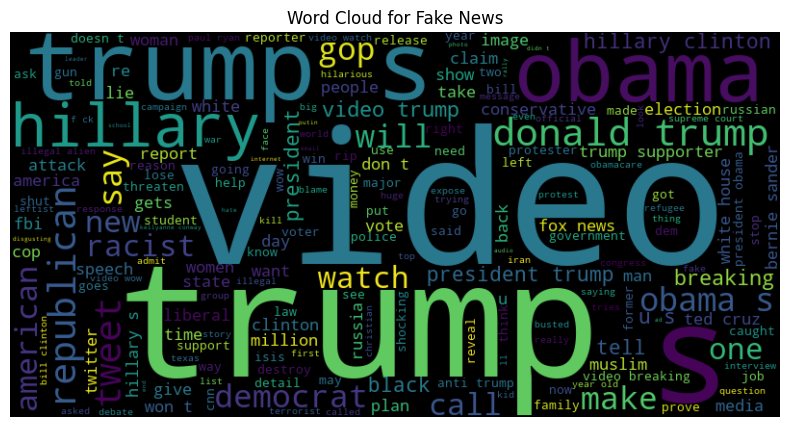

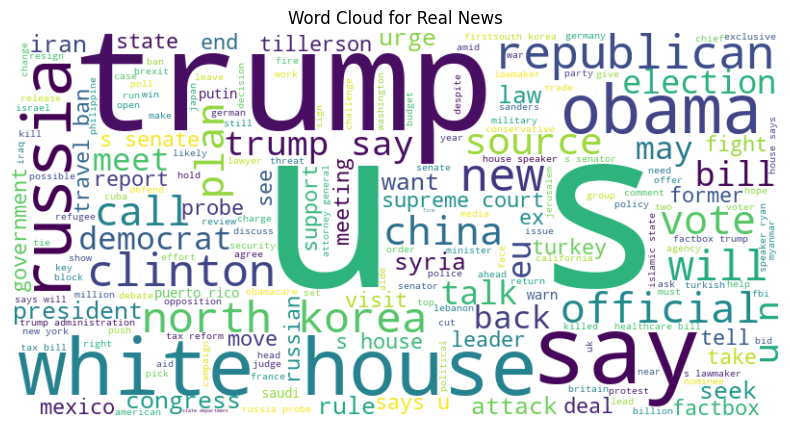

In [9]:
from wordcloud import WordCloud

# Fake news word cloud
fake_text = " ".join(df[df['tag'] == 0]['headline'])
fake_wc = WordCloud(width=800, height=400, background_color='black').generate(fake_text)
plt.figure(figsize=(10, 5))
plt.imshow(fake_wc, interpolation='bilinear')
plt.title("Word Cloud for Fake News")
plt.axis('off')
plt.show()

# Real news word cloud
real_text = " ".join(df[df['tag'] == 1]['headline'])
real_wc = WordCloud(width=800, height=400, background_color='white').generate(real_text)
plt.figure(figsize=(10, 5))
plt.imshow(real_wc, interpolation='bilinear')
plt.title("Word Cloud for Real News")
plt.axis('off')
plt.show()

<h3 style="color: #b35a;">-- Train-Test Split --</h3>

In [10]:
from sklearn.model_selection import train_test_split
X = df['headline']
y = df['tag']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
X_train.shape

(27321,)

In [12]:
X_test.shape

(6831,)

<h3 style="color: #b35a;">-- Text preprocessing with TF-IDF --</h3>

In [13]:
vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

<h3 style="color: #b35a;">-- Random Forest Classifier --</h3>

In [14]:
classifier = RandomForestClassifier(n_estimators=200, criterion='entropy', max_depth=10, random_state=42)
classifier.fit(X_train_tfidf, y_train)

RandomForestClassifier(criterion='entropy', max_depth=10, n_estimators=200,
                       random_state=42)

<h1 style="color: #e8891d;">Model Evaluation</h1>

In [15]:
y_pred = classifier.predict(X_test_tfidf)

In [16]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8399941443419704

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.93      0.86      3529
           1       0.91      0.74      0.82      3302

    accuracy                           0.84      6831
   macro avg       0.85      0.84      0.84      6831
weighted avg       0.85      0.84      0.84      6831



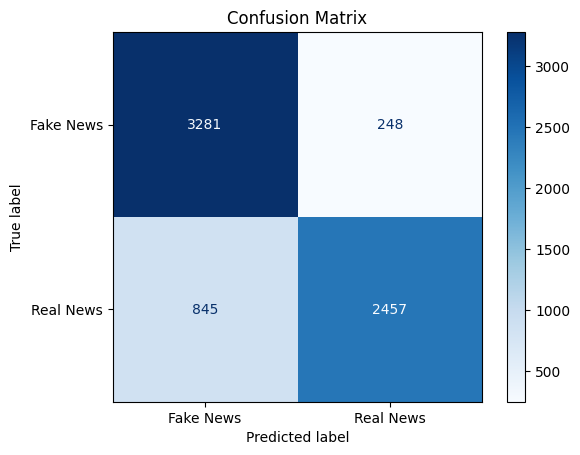

In [17]:
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, display_labels=['Fake News', 'Real News'], cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

<h3 style="color: #b35a;">-- Top 10 Features for the Classification --</h3>

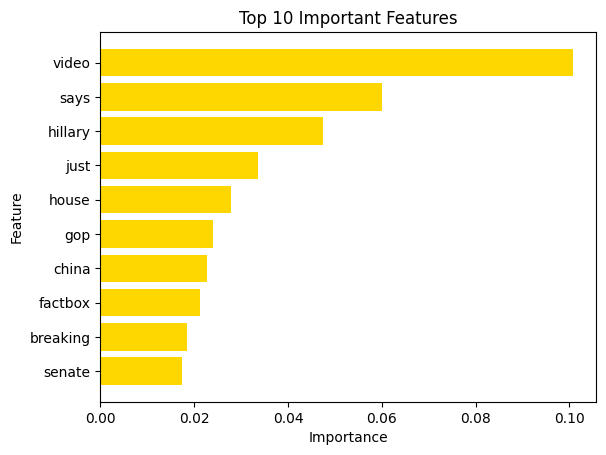

In [18]:
import numpy as np

feature_names = vectorizer.get_feature_names_out()
importances = classifier.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features


plt.barh(range(len(indices)), importances[indices], align='center', color='gold')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

<h1 style="color: #e8891d;">Improving the Data Preprocessing </h1>

In [19]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import stopwords
import nltk
import re

In [20]:
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\anacs\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\anacs\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\anacs\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

<h3 style="color: #b35a;">-- Some Data Cleaning --</h3>

In [21]:
df.dropna(subset=['headline', 'tag'], inplace=True)
df.drop_duplicates(inplace=True)

In [22]:
df.shape

(32206, 2)

<h3 style="color: #b35a;">-- Extenting Text Preprocessing --</h3>

In [23]:
def preprocess_text(text):
    # Remove special characters, digits, and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    lemmatizer = WordNetLemmatizer()
    words = text.split()
    words = [lemmatizer.lemmatize(word) for word in words if word not in stopwords.words('english')]
    return ' '.join(words)

In [24]:
df['cleaned_headline'] = df['headline'].apply(preprocess_text)

In [25]:
X_base = df['headline']  # For the model without enhanced preprocessing
X_enhanced = df['cleaned_headline']  # Enhanced preprocessing
y = df['tag']

In [26]:
X_enhanced_train, X_enhanced_test, y_enhanced_train, y_enhanced_test = train_test_split(X_enhanced, y, test_size=0.2, random_state=42)

In [27]:
enhanced_vectorizer = TfidfVectorizer(stop_words='english', max_features=5000, ngram_range=(1, 2), max_df=0.8, min_df=5)

In [28]:
X_enhanced_train_tfidf = enhanced_vectorizer.fit_transform(X_enhanced_train)
X_enhanced_test_tfidf = enhanced_vectorizer.transform(X_enhanced_test)

In [29]:
enhanced_classifier = RandomForestClassifier(random_state=42, n_estimators=100)
enhanced_classifier.fit(X_enhanced_train_tfidf, y_enhanced_train)
enhanced_y_pred = enhanced_classifier.predict(X_enhanced_test_tfidf)

In [30]:
print("Enhanced Model Accuracy:", accuracy_score(y_enhanced_test, enhanced_y_pred))
print("\nEnhanced Model Classification Report:\n", classification_report(y_enhanced_test, enhanced_y_pred))

Enhanced Model Accuracy: 0.8945979509469109

Enhanced Model Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.90      0.90      3233
           1       0.90      0.89      0.89      3209

    accuracy                           0.89      6442
   macro avg       0.89      0.89      0.89      6442
weighted avg       0.89      0.89      0.89      6442



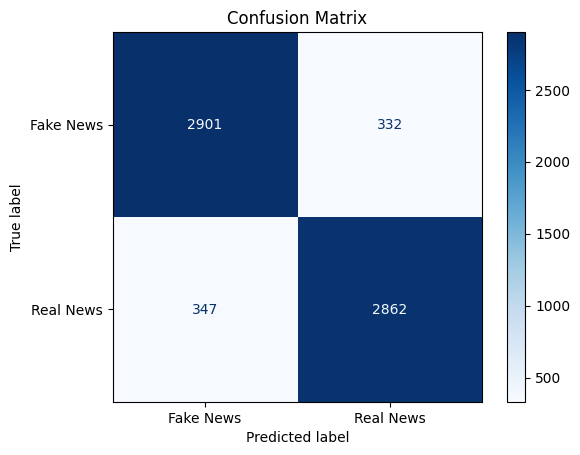

In [31]:
ConfusionMatrixDisplay.from_predictions(y_enhanced_test, enhanced_y_pred, display_labels=['Fake News', 'Real News'], cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

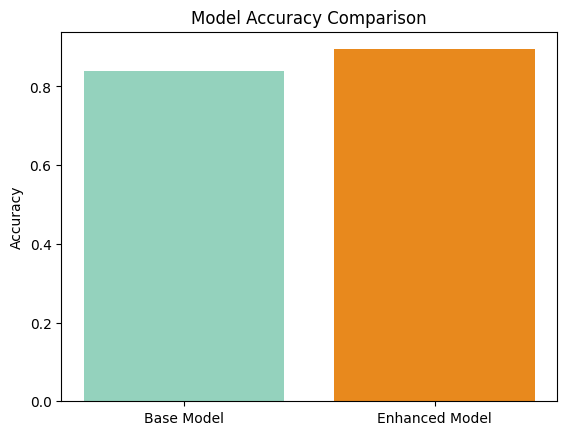

In [32]:
models = ['Base Model', 'Enhanced Model']
accuracies = [accuracy_score(y_test, y_pred), accuracy_score(y_enhanced_test, enhanced_y_pred)]

plt.bar(models, accuracies, color=['#94D2BD', '#e8891d'])
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
plt.show()

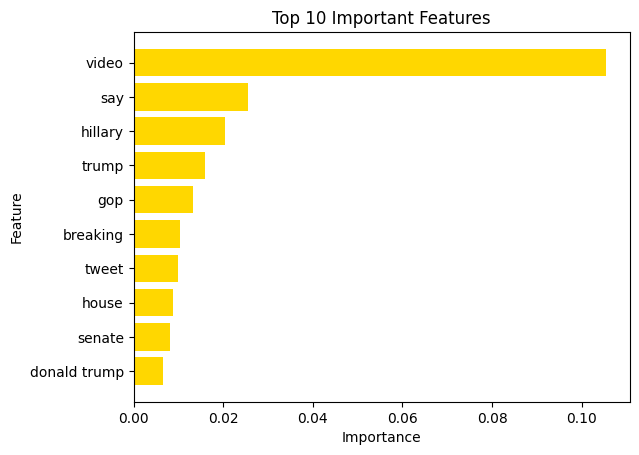

In [33]:
# Extract feature importance from the classifier
feature_names = enhanced_vectorizer.get_feature_names_out()
importances = enhanced_classifier.feature_importances_
indices = np.argsort(importances)[-10:]  # Top 10 features


plt.barh(range(len(indices)), importances[indices], align='center', color='gold')
plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
plt.title("Top 10 Important Features")
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.show()

<h1 style="color: #e8891d;"> Using a Pre-trained Model </h1>

In [34]:
df.sample(10)

,tag,headline,cleaned_headline
19040,1,trump slow to implement russia\tiran\tnorth ko...,trump slow implement russia iran north korea s...
13701,0,[video] dumb and dumber star bashes trump‚use ...,video dumb dumber star bash trumpuse worst exa...
13782,0,someone call the waaambulance! glenn beck warn...,someone call waaambulance glenn beck warns hel...
32121,1,u.s. envoy says no communication\tno signal fr...,u envoy say communication signal north korea a...
15400,0,breaking: texas cop stabbed 14 times by man wh...,breaking texas cop stabbed time man desire kil...
32773,1,venezuela government and opposition to resume ...,venezuela government opposition resume dialogu...
13938,0,holy muslim indoctrination! sesame street intr...,holy muslim indoctrination sesame street intro...
21880,1,tillerson faces tough talks in moscow amid inc...,tillerson face tough talk moscow amid increase...
29130,1,philippines' maoists declare traditional chris...,philippine maoist declare traditional christma...
14238,0,reporter asks: will obama golf instead of atte...,reporter asks obama golf instead attend scalia...


In [35]:
df['cleaned_headline'] = df['cleaned_headline'].str.strip()

In [36]:
train_data = {'text': X_enhanced_train.tolist(), 'label': y_enhanced_train.tolist()}
test_data = {'text': X_enhanced_test.tolist(), 'label': y_enhanced_test.tolist()}

In [37]:
from datasets import Dataset, DatasetDict

dataset = DatasetDict({
    'train': Dataset.from_dict(train_data),
    'test': Dataset.from_dict(test_data),
})

In [38]:
from transformers import AutoTokenizer

# Tokenization
tokenizer = AutoTokenizer.from_pretrained("distilbert-base-uncased")

In [39]:
def tokenize_function(model):
    return tokenizer(model['text'], padding="max_length", truncation=True, max_length=128)

tokenized_datasets = dataset.map(tokenize_function, batched=True)

Map:   0%|          | 0/25764 [00:00<?, ? examples/s]

Map:   0%|          | 0/6442 [00:00<?, ? examples/s]

In [40]:
from transformers import AutoModelForSequenceClassification

# Pre-trained Model
distilbert_model = AutoModelForSequenceClassification.from_pretrained("distilbert-base-uncased", num_labels=2)

Some weights of DistilBertForSequenceClassification were not initialized from the model checkpoint at distilbert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight', 'pre_classifier.bias', 'pre_classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [41]:
from sklearn.metrics import precision_recall_fscore_support

In [42]:
# Metrics
def compute_metrics(pred):
    predictions, labels = pred
    preds = predictions.argmax(axis=1)
    precision, recall, f1, _ = precision_recall_fscore_support(labels, preds, average='binary')
    acc = accuracy_score(labels, preds)
    return {"accuracy": acc, "precision": precision, "recall": recall, "f1": f1}

In [43]:
from transformers import TrainingArguments, Trainer

# Training Arguments and Trainer
training_args = TrainingArguments(
    output_dir="./results",
    evaluation_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=3,
    weight_decay=0.01,
    save_strategy="epoch",
    logging_dir="./logs",
    logging_strategy="steps",
    logging_steps=50,
    load_best_model_at_end=True,
    metric_for_best_model="accuracy",
    report_to="none",
)

trainer = Trainer(
    model=distilbert_model,
    args=training_args,
    train_dataset=tokenized_datasets['train'],
    eval_dataset=tokenized_datasets['test'],
    tokenizer=tokenizer,
    compute_metrics=compute_metrics,
)

In [44]:
trainer.train()

Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,0.183200,0.142545,0.949084,0.957447,0.939545,0.948411
2,0.101800,0.166433,0.953120,0.951257,0.954815,0.953033
3,0.061600,0.201129,0.954517,0.955910,0.952633,0.954269


TrainOutput(global_step=4833, training_loss=0.12397895891819832, metrics={'train_runtime': 5719.3967, 'train_samples_per_second': 13.514, 'train_steps_per_second': 0.845, 'total_flos': 2559667544229888.0, 'train_loss': 0.12397895891819832, 'epoch': 3.0})

Classification Report:
              precision    recall  f1-score   support

   Fake News       0.95      0.96      0.95      3233
   Real News       0.96      0.95      0.95      3209

    accuracy                           0.95      6442
   macro avg       0.95      0.95      0.95      6442
weighted avg       0.95      0.95      0.95      6442



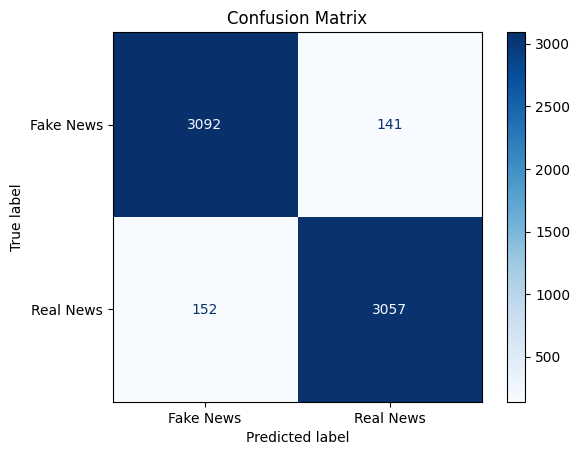

In [45]:
predictions = trainer.predict(tokenized_datasets['test'])

preds = predictions.predictions.argmax(axis=1)
true_labels = predictions.label_ids

print("Classification Report:")
print(classification_report(true_labels, preds, target_names=["Fake News", "Real News"]))

cm = confusion_matrix(true_labels, preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=["Fake News", "Real News"])
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix") 
plt.show()

In [15]:
model.save_pretrained("saved_model")
tokenizer.save_pretrained("saved_model")

('saved_model\\tokenizer_config.json',
 'saved_model\\special_tokens_map.json',
 'saved_model\\vocab.txt',
 'saved_model\\added_tokens.json',
 'saved_model\\tokenizer.json')